In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [25]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)

In [26]:
# learn about dtypes : 
# https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Columns: 245 entries, Unnamed: 0 to totalwgt_lb
dtypes: float64(170), int64(74), object(1)
memory usage: 25.4+ MB


In [28]:
# caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt

# value counts
df.outcome.value_counts()

1    9148
4    1921
2    1862
6     352
5     190
3     120
Name: outcome, dtype: int64

In [29]:
# make the dataframe with chosen variables
# caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
df2 = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]
df2.info()
# check for nan values and remove from the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Data columns (total 8 columns):
caseid         13593 non-null int64
prglngth       13593 non-null int64
outcome        13593 non-null int64
pregordr       13593 non-null int64
birthord       9148 non-null float64
totalwgt_lb    9038 non-null float64
agepreg        13241 non-null float64
finalwgt       13593 non-null float64
dtypes: float64(4), int64(4)
memory usage: 849.6 KB


In [30]:
df2['outcome'].value_counts(sort=False)

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [31]:
df2[df2['outcome']==np.nan]

,caseid,prglngth,outcome,pregordr,birthord,totalwgt_lb,agepreg,finalwgt


In [32]:
from collections import defaultdict
# The difference is that a defaultdict will "default" a value if that key has not been set yet. 
# If you didn't use a defaultdict you'd have to check to see if that key exists, and if it doesn't, 
# set it to what you want.

# defaultdict examples
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1),('grey',4),('red',21)]
d1 = defaultdict(list) 
for key,value in s:
    d1[key].append(value)
# Now lets get back to the problem

print(d1.values())
def makePregMap():
    d = defaultdict(list)
    for key,value in df2['caseid'].iteritems():
        d[key].append(value)
    return d

dict_values([[1, 3], [2, 4], [1, 21], [4]])


In [33]:
caseid = 10229
df2.loc[df2['caseid']==caseid]['outcome']

11093    4
11094    4
11095    4
11096    4
11097    4
11098    4
11099    1
Name: outcome, dtype: int64

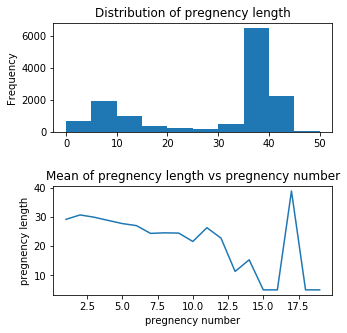

In [80]:
# TO CHECK WHETHER THE FIRST BABY ARRIVES LATE THAN OTHERS

# explore the variables one at a time

fig, (ax1,ax2) = plt.subplots(nrows = 2)
# plot the pregnency length
df2['prglngth'].value_counts()
series1 = df2['prglngth']
series1.plot.hist(ax=ax1,title='Distribution of pregnency length',figsize=(5,5))
# compare the sum,mean,std etc
# grouping the columns
series2 = df2.groupby('pregordr').mean()['prglngth']
series2.plot(ax=ax2,title='Mean of pregnency length vs pregnency number')
ax2.set_xlabel('pregnency number')
ax2.set_ylabel('pregnency length in weeks')

# adjust the horizontal spacing between the subplots
plt.subplots_adjust(hspace=0.5)
# pregency length is in week

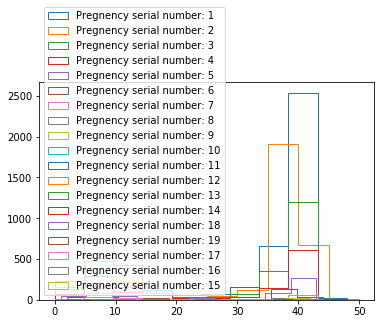

In [35]:
#plotting histogram for all pregnency orders 
types_pregorder = df2['pregordr'].value_counts().index
for order in types_pregorder:
    series1 = df2[df2['pregordr'] == order]['prglngth']
    label = 'Pregnency serial number: '+str(order)
    plt.hist(series1,histtype='step',label=label)
    plt.legend()
    

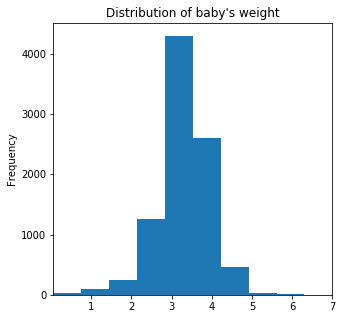

In [53]:
# distribution of birthwgt 
series_wgt = df2['totalwgt_lb']*0.453592
fig2, ax2 = plt.subplots()
# plotting histogram with properties
series_wgt.plot.hist(ax=ax2,figsize=(5,5),title='Distribution of baby\'s weight',xlim=(min(series_wgt),max(series_wgt)))

count    13241.000000
mean        24.688151
std          5.814708
min         10.330000
25%         20.080000
50%         23.910000
75%         28.660000
max         44.080000
Name: agepreg, dtype: float64

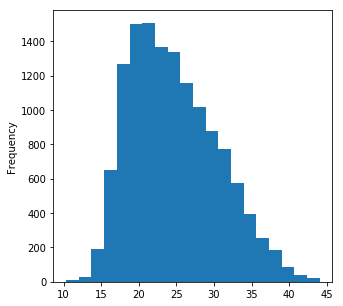

In [85]:
# distribution of mother's age at the time of pregnency
df2['agepreg'].plot.hist(figsize=(5,5),bins=20)
# normal distributio
df2['agepreg'].describe()

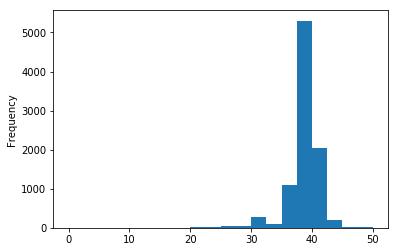

In [90]:
# selecting only the live birth
df3= df2[df2['outcome']==1]
df3['prglngth'].plot.hist(bins=20)

# outcome 1- live birth and 4-miscarriage = pregnency that ended spontaneously with no medical cause